<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Preparing-our-dataset" data-toc-modified-id="1.-Preparing-our-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Preparing our dataset</a></span></li><li><span><a href="#2.-EDA" data-toc-modified-id="2.-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. EDA</a></span></li><li><span><a href="#2.-Pairwise-relationships-between-continuous-variables" data-toc-modified-id="2.-Pairwise-relationships-between-continuous-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2. Pairwise relationships between continuous variables</a></span></li><li><span><a href="#3.-Splitting-our-data" data-toc-modified-id="3.-Splitting-our-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>3. Splitting our data</a></span></li><li><span><a href="#3.-Normalizing-the-feature-data" data-toc-modified-id="3.-Normalizing-the-feature-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>3. Normalizing the feature data</a></span></li><li><span><a href="#6.-Train-a-decision-tree-to-classify-genre" data-toc-modified-id="6.-Train-a-decision-tree-to-classify-genre-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>6. Train a decision tree to classify genre</a></span></li><li><span><a href="#7.-Compare-our-decision-tree-to-a-KNN-classifier" data-toc-modified-id="7.-Compare-our-decision-tree-to-a-KNN-classifier-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>7. Compare our decision tree to a KNN classifier</a></span></li><li><span><a href="#10.-Views" data-toc-modified-id="10.-Views-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>10. Views</a></span></li></ul></div>

**Obiettivo:** Senza ascoltare alcuna canzone, classificare il tipo di musica di ogni traccia, a partire dal csv e dal file json contenente le metriche della canzone.

### 1. Preparing our dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


df_csv = pd.read_csv("dataset.csv")
df_json = pd.read_json("metrics.json")
df_csv.head()


,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]","[58, 12, 45]",NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]","[58, 12, 45]",NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],"[25, 12]",NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],"[25, 12]",NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],"[26, 12]",NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


### 2. EDA

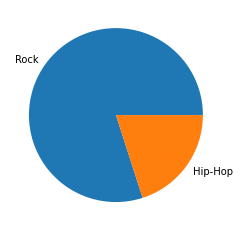

In [2]:
plt.pie(df_csv['genre_top'].value_counts(), labels=list(df_csv['genre_top'].unique()));


In [3]:
df = df_csv[["track_id","genre_top"]]
df = pd.merge(df, df_json, on ='track_id', how ="inner")
df.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


### 2. Pairwise relationships between continuous variables

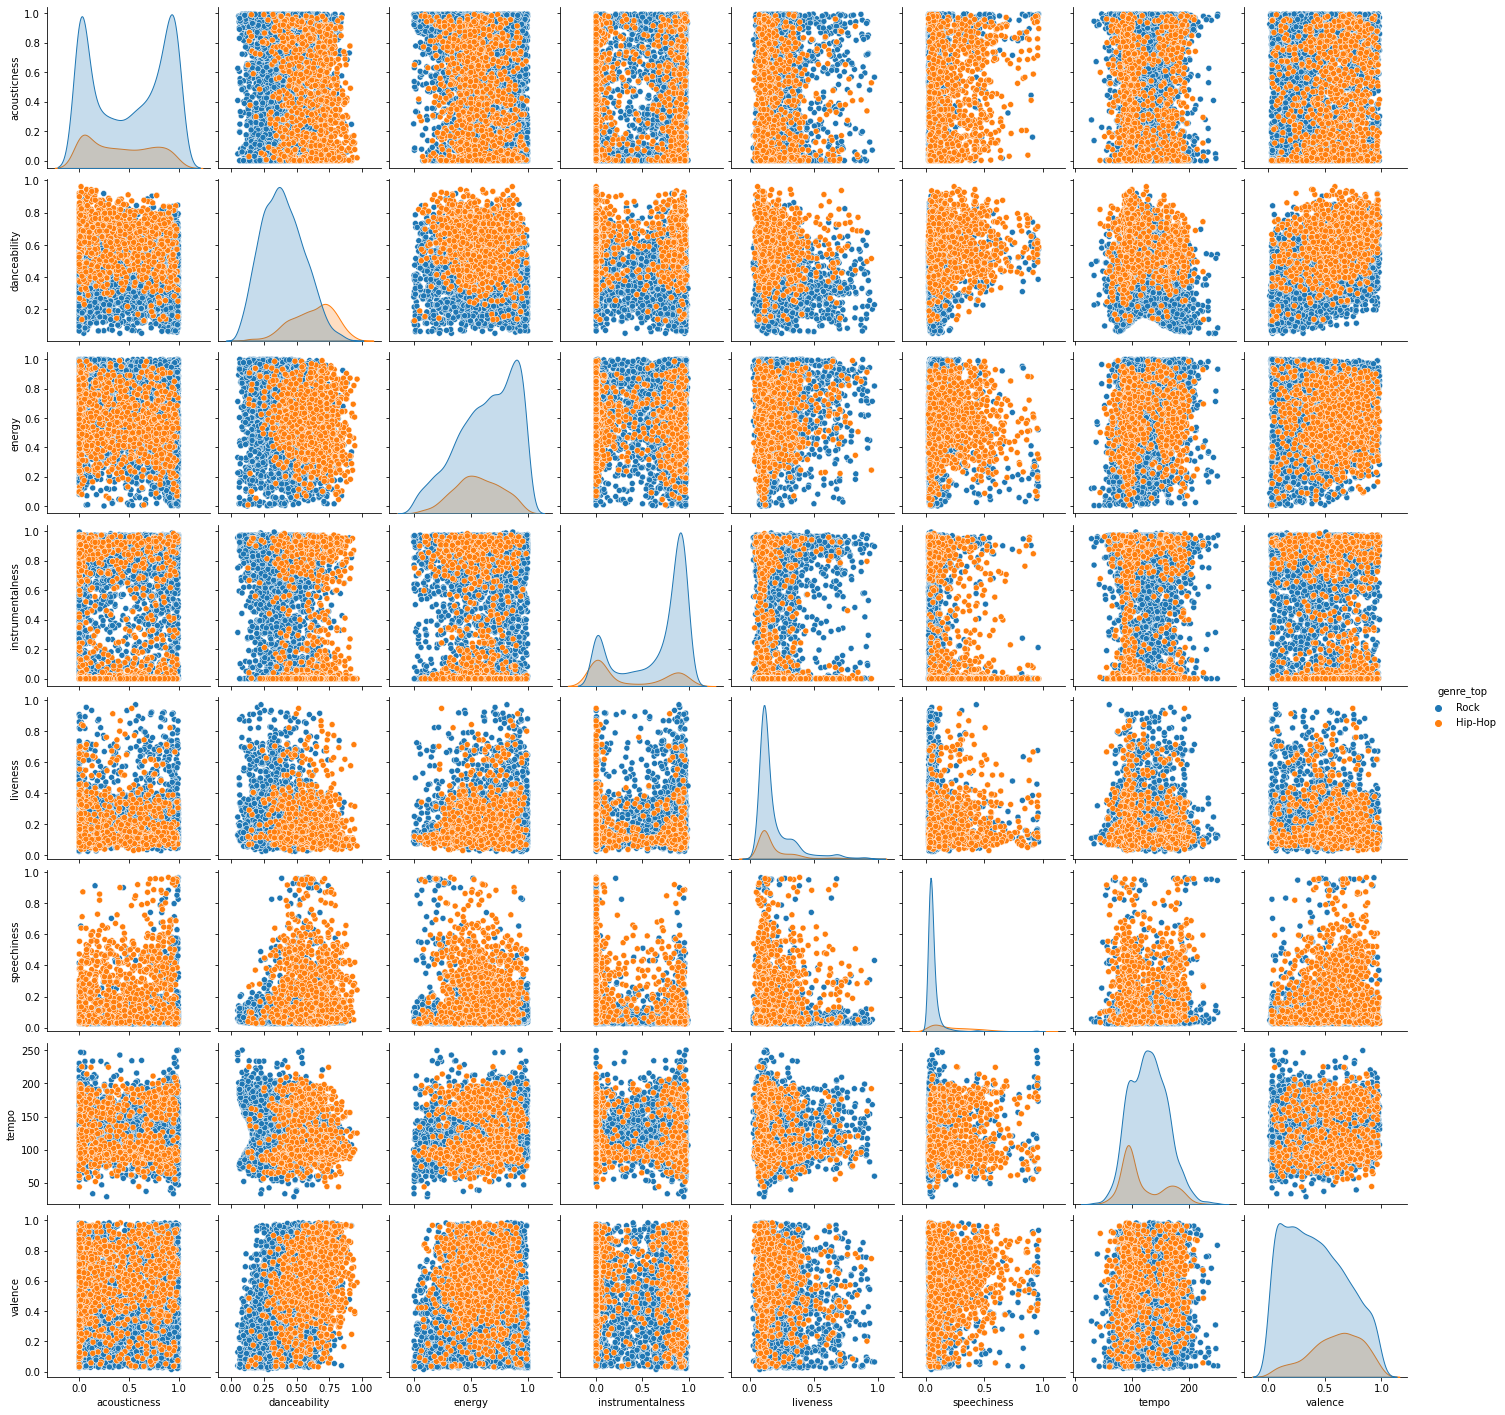

In [4]:
subset = df.iloc[:,1:10]
sns.pairplot(subset,hue="genre_top")

In [5]:
corr_metrics = df.corr()

corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


### 3. Splitting our data

In [6]:
X=df.drop(["genre_top","track_id"],axis=1)
y=df["genre_top"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
X_train

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
2851,0.010487,0.251115,0.982086,0.830243,0.213312,0.079315,135.458,0.039423
3262,0.005969,0.347161,0.896387,0.000003,0.272978,0.032797,93.812,0.939504
4578,0.943028,0.516777,0.114157,0.963264,0.113841,0.038008,167.913,0.813471
1774,0.981615,0.529577,0.314415,0.970609,0.111988,0.027651,101.851,0.545937
1957,0.509788,0.379469,0.425417,0.944989,0.166501,0.028889,100.683,0.644653
...,...,...,...,...,...,...,...,...
4426,0.001396,0.701181,0.360302,0.785723,0.113794,0.060371,95.120,0.624838
466,0.771836,0.710007,0.697584,0.000078,0.196290,0.207293,87.410,0.750693
3092,0.413420,0.494204,0.655205,0.850368,0.150639,0.038676,138.798,0.837199
3772,0.000021,0.232832,0.947861,0.002208,0.396454,0.090599,139.143,0.241046


### 3. Normalizing the feature data

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7
0,-1.288452,-1.018240,1.453729,0.603707,0.162978,-0.169291,0.264912,-1.555937
1,-1.300742,-0.491935,1.101457,-1.607798,0.558829,-0.494501,-0.962567,1.830329
2,1.248554,0.437509,-2.113919,0.958034,-0.496961,-0.458071,1.221495,1.356170
3,1.353533,0.507651,-1.290752,0.977597,-0.509255,-0.530477,-0.725625,0.349659
4,0.069911,-0.314901,-0.834477,0.909355,-0.147594,-0.521825,-0.760051,0.721048
...,...,...,...,...,...,...,...,...
3836,-1.313183,1.447993,-1.102133,0.485118,-0.497274,-0.301732,-0.924015,0.646498
3837,0.782821,1.496354,0.284274,-1.607597,0.050043,0.725410,-1.151261,1.119986
3838,-0.192260,0.313819,0.110072,0.657313,-0.252830,-0.453399,0.363356,1.445438
3839,-1.316924,-1.118431,1.313045,-1.601926,1.378030,-0.090402,0.373525,-0.797393


### 6. Train a decision tree to classify genre 

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [11]:
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.8896982310093653

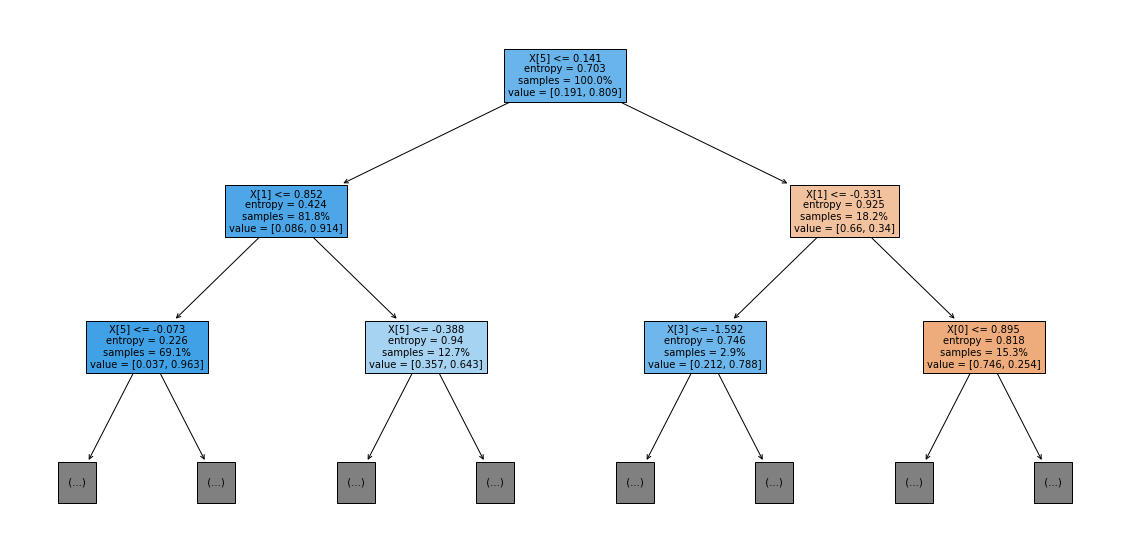

In [12]:
from sklearn.tree import plot_tree



f, ax = plt.subplots(1,1, figsize=(20, 10))

plot_tree(clf, ax=ax, fontsize=10, filled=True, proportion=True, max_depth=2)

plt.show()

### 7. Compare our decision tree to a KNN classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.9125910509885536

### 10. Views

In [14]:
from sklearn.metrics import classification_report

modelli = [
DecisionTreeClassifier(criterion='entropy'),
KNeighborsClassifier(n_neighbors=10)
]



entries = []
for modello in modelli:
    nome_modello = modello.__class__.__name__
    clsffit = modello.fit(X_train,y_train)
    print('\t\tCLASSIFICATIION METRICS "{}":\n'.format(nome_modello))
    print(classification_report(y_test, modello.predict(X_test),
    target_names= df['genre_top'].unique()))




		CLASSIFICATIION METRICS "DecisionTreeClassifier":

              precision    recall  f1-score   support

        Rock       0.71      0.71      0.71       178
     Hip-Hop       0.93      0.93      0.93       783

    accuracy                           0.89       961
   macro avg       0.82      0.82      0.82       961
weighted avg       0.89      0.89      0.89       961

		CLASSIFICATIION METRICS "KNeighborsClassifier":

              precision    recall  f1-score   support

        Rock       0.78      0.74      0.76       178
     Hip-Hop       0.94      0.95      0.95       783

    accuracy                           0.91       961
   macro avg       0.86      0.84      0.85       961
weighted avg       0.91      0.91      0.91       961

